In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
np.random.seed(2)

In [4]:
with open('mnist.pkl', 'rb') as f:
    mnist = pickle.load(f)

In [5]:
model_pca = PCA(n_components=30)
mnist_pca = model_pca.fit_transform(mnist['images'].reshape((-1, 28 ** 2)))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.032s...
[t-SNE] Computed neighbors for 10000 samples in 10.289s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 276.467858
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.571518
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170

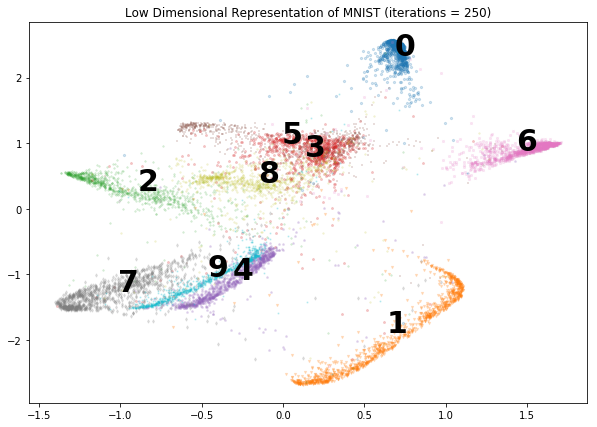

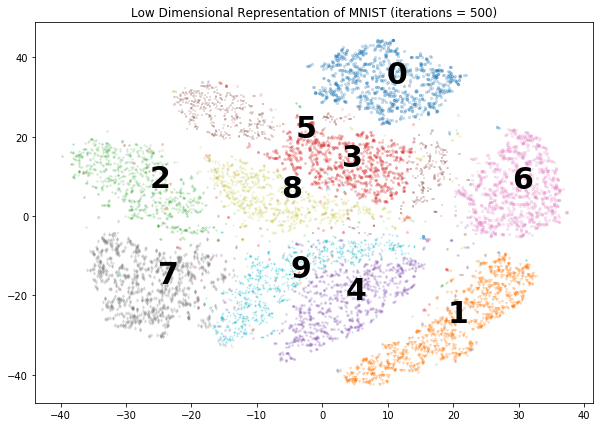

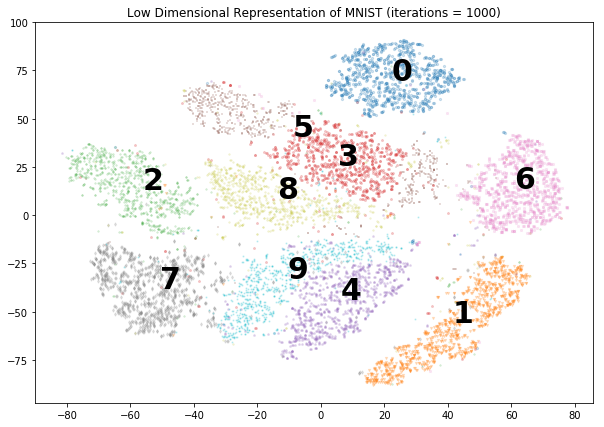

In [6]:
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
for iterations in [250, 500, 1000]:
    model_tsne = TSNE(random_state=0, verbose=1, n_iter=iterations, n_iter_without_progress=iterations)
    mnist_tsne = model_tsne.fit_transform(mnist_pca)

    plt.figure(figsize=(10, 7))
    plt.title(f'Low Dimensional Representation of MNIST (iterations = {iterations})')
    for i in range(10):
        selections = mnist_tsne[mnist['labels'] == i]
        plt.scatter(selections[:,0], selections[:,1], alpha=0.2, marker=MARKER[i], s=5)
        x, y = selections.mean(axis=0)
        plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size': 30})    
plt.show()

In [7]:
# Unit Test

In [8]:
import unittest

class TestPCAtSNE(unittest.TestCase):
    
    """unittest for PCA model"""
    def test_model_pca(self):
        model_pca = PCA(n_components=30)
        self.assertMultiLineEqual(str(model_pca),"""PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)""")
        
    """unittest for TSNE model"""
    def test_model_tsne250(self):
        model_tsne = TSNE(random_state=0, verbose=1, n_iter=250, n_iter_without_progress=250)
        self.assertMultiLineEqual(str(model_tsne),"""TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=250, n_iter_without_progress=250,
   perplexity=30.0, random_state=0, verbose=1)""")
        
    def test_model_tsne500(self):
        model_tsne = TSNE(random_state=0, verbose=1, n_iter=500, n_iter_without_progress=500)
        self.assertMultiLineEqual(str(model_tsne),"""TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=500, n_iter_without_progress=500,
   perplexity=30.0, random_state=0, verbose=1)""")
        
    def test_model_tsne1000(self):
        model_tsne = TSNE(random_state=0, verbose=1, n_iter=1000, n_iter_without_progress=1000)
        self.assertMultiLineEqual(str(model_tsne),"""TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=1000,
   perplexity=30.0, random_state=0, verbose=1)""")

In [9]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestPCAtSNE)
unittest.TextTestRunner(verbosity=2).run(suite)

test_model_pca (__main__.TestPCAtSNE) ... ok
test_model_tsne1000 (__main__.TestPCAtSNE) ... ok
test_model_tsne250 (__main__.TestPCAtSNE) ... ok
test_model_tsne500 (__main__.TestPCAtSNE) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.008s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>